Hola **Andrea**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para dar una correcta presentación de tu proyecto procura siempre incluir un título y un párrafo introductorio al mismo, recuerda que los títulos se deben escribir así en celdas markdown: `# Título`
</div>

In [1]:
#importe de librerias 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
import numpy as np 
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 







In [2]:
# Lectura de los datos.
gym=pd.read_csv('/datasets/gym_churn_us.csv')

# Paso 1. Descargar los datos

Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [3]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- los datos están relativamente concentrados alrededor de la media, lo que sugiere que no ha muchos valores atípicos.
- La mayoría de los valores están cerca de la media, lo que indica que los datos son relativamente homogéneos.
- No hay valores extremadamente altos o bajos, lo que sugiere que los datos están dentro de un rango razonable.
(Esto en cuanto a la mayoría de las columnas numéricas.)

- Por otro lado hay un columna con unos datos un tanto muy distantes entre sí, en este orden de ideas los vamos analizando a través del avance del proyecto. 

In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
gym.tail()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


In [6]:
gym.columns  = gym.columns.str.lower()

- En este paso realizamos la converción de los nombres de las columnas a mínusculas para trabajar de una manera más comoda.

In [7]:
gym.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [8]:
gym.duplicated().sum()

0

- Bueno hasta aquí los datos están limpios para iniciar a más profundidad, 

# Llevar a cabo el análisis exploratorio de datos (EDA)

- Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [9]:
gym_group = gym.groupby('churn')

In [10]:
gym_mean = gym_group.mean()
print(gym_mean)

         gender  near_location   partner  promo_friends     phone  \
churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       contract_period  group_visits        age  avg_additional_charges_total  \
churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       avg_class_frequency_current_month  
churn                                     
0                               2.0

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecha la exploración inicial de tus datos, siempre hay que entender con que se está trabajando
</div>

# Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

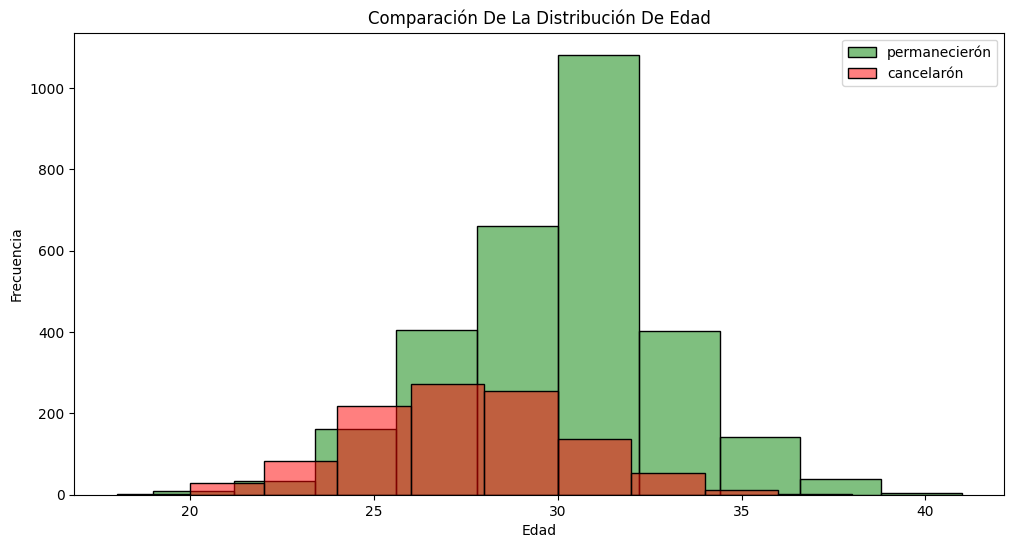

In [11]:
plt.figure(figsize=(12,6))

sns.histplot(gym[gym['churn']==0]['age'], bins=10, color='green', alpha=0.5, label='permanecierón')
sns.histplot(gym[gym['churn']==1]['age'], bins=10, color='red', alpha=0.5, label='cancelarón')
plt.title('Comparación De La Distribución De Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

- Wooow evindentemente en comparaión con el grupo que permanecio la diferencia es un tanto no tan notoria, y tenemos una muy buena estadística de los que permanecieron, justo sobre la misma edad del equipo contrario (25-30) 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Estas gráficas son muy claras para mostrar las diferencias entre cada variable de tu dataset, además el redactar conclusiones tan claras de las mismas ayuda mucho a seguir el proceso de análisis 
</div>


# Crea una matriz de correlación y muéstrala.


In [12]:
correlacion=gym.corr()
print(correlacion)

                                     gender  near_location   partner  \
gender                             1.000000       0.006699 -0.010463   
near_location                      0.006699       1.000000 -0.005119   
partner                           -0.010463      -0.005119  1.000000   
promo_friends                     -0.005033       0.210964  0.451960   
phone                             -0.008542      -0.015763  0.009970   
contract_period                    0.000502       0.150233  0.306166   
group_visits                       0.017879       0.154728  0.022710   
age                                0.013807       0.058358  0.047480   
avg_additional_charges_total      -0.009334       0.040761  0.022941   
month_to_end_contract             -0.001281       0.143961  0.294632   
lifetime                           0.013579       0.070921  0.061229   
avg_class_frequency_total          0.014620       0.043127  0.024938   
avg_class_frequency_current_month  0.009156       0.062664  0.04

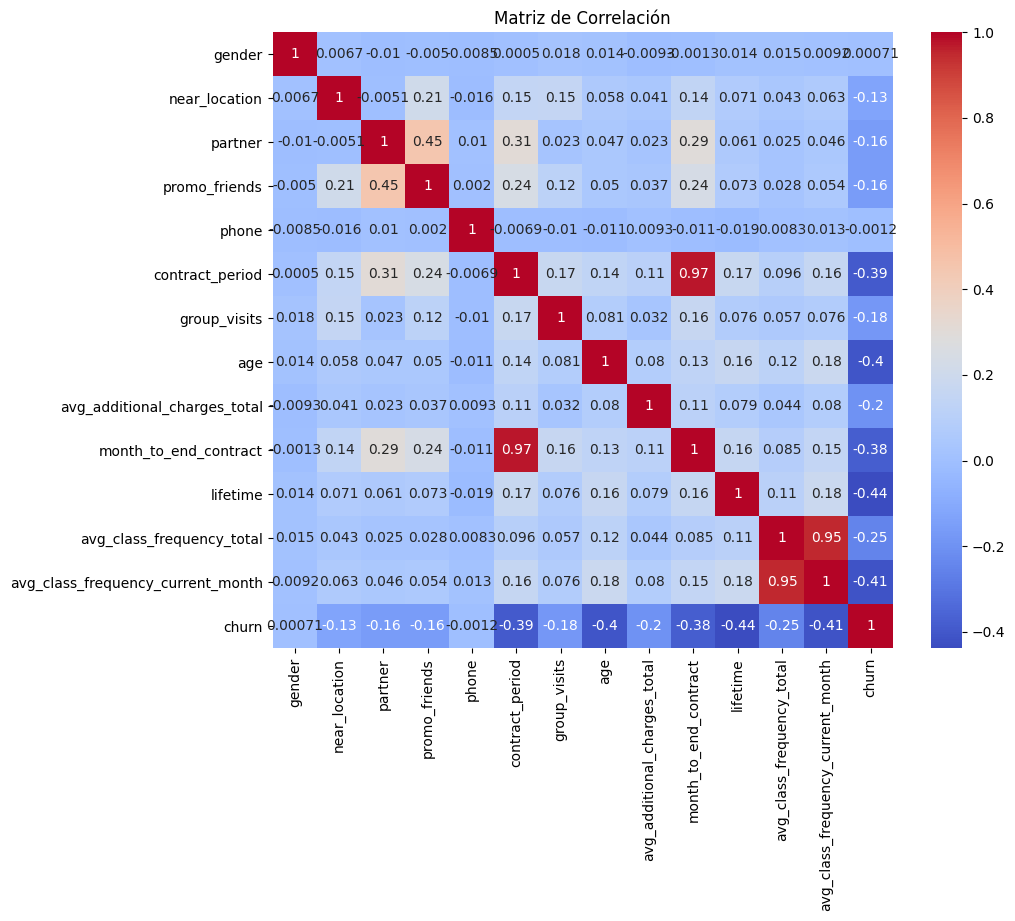

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

- en nuestro mapa de color nos muestra que hay una fuerte correlación entre las variables y a su vez con otras en diferentes grados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien mostrada la matriz de correlación! Solo ten en cuenta que no siempre correlación significa causalidad, puede que en algunos casos tengas variables altamente correlacionadas pero no necesariamente son causa una de la otra

# Paso 3. Construir un modelo para predecir la cancelación de usuarios

# Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

# Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [14]:
x=gym.drop(['churn'], axis=1)
y=gym['churn']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

#creamos modelo de clasificación binaria utilizando Rnadom Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(x_train, y_train)

y_pred=rf.predict(x_test)

print("Accuracy:")
print(accuracy_score(y_test, y_pred))
print("Inforne de Clasificación:")
print(classification_report(y_test, y_pred))
      

Accuracy:
0.91
Inforne de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.85      0.78      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800



- En particular, los resultados sugieren que el modelo es muy bueno en identificar los casos en los que no se cancela el usuario(precisión del 93% y recuerdo (recall) del 95%), y también es bastante bueno en identificar los casos en los que se cancela el usuario(precisión del 85% y recuerdo del 78%) 


- El modelo puedo ser utilizado para identificar clientes que están en riesgo de cancelar su membresía, lo que le permitira a gym tomar medidas para retenerlos.

- También nos ayuda a identificar áreas en las que el gimnasio puede mejorar la experiencia del cliente, lo que podría ayudar a reducir la cancelación de la membresía.

- Desarrollar estrategias de retención de clientes, como ofertas especiales o progrmas de lealtad, que puedan ayudar a reducir la cancelación de la membresía.

# Entrena el modelo en el set de entrenamiento con dos métodos:
# regresión logística;
# bosque aleatorio.

In [15]:
# regresió logística

logreg = LogisticRegression()
logreg.fit(x_train, y_train)


# Bosque Aleatorio
rf = RandomForestClassifier(n_estimators = 100, random_state =42)
rf.fit(x_train, y_train)


# regresión logística
y_pred_logreg = logreg.predict(x_test)
print()
print("precisión:", accuracy_score(y_test, y_pred_logreg))
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred_logreg))
print("Matriz de confusión")
print(confusion_matrix(y_test, y_pred_logreg))

# Bosque aleatorio

y_pred_rf = rf.predict(x_test)
print()
print("presición:", accuracy_score(y_test, y_pred_rf))
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



precisión: 0.91
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       598
           1       0.86      0.77      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.86      0.88       800
weighted avg       0.91      0.91      0.91       800

Matriz de confusión
[[573  25]
 [ 47 155]]

presición: 0.91
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.85      0.78      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800

Matriz de confusión:
[[570  28]
 [ 44 158]]


- bueno podemos ver que la precisión fue un tanto muy aceptable para ambos métodos; en resumen, aunque ambos modelos son muy similares, creo que el bosque aleatorio es ligeramente mejor debido a su mayor precisión y recorde en la clase 0. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Obtuviste resultados muy buenos en el entrenamiento de tus modelos y realizaste el análisis adecuado a partir de los mismos
    
</div>

# Paso 4. Crear clústeres de usuarios/as
# Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

# Estandariza los datos.

Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

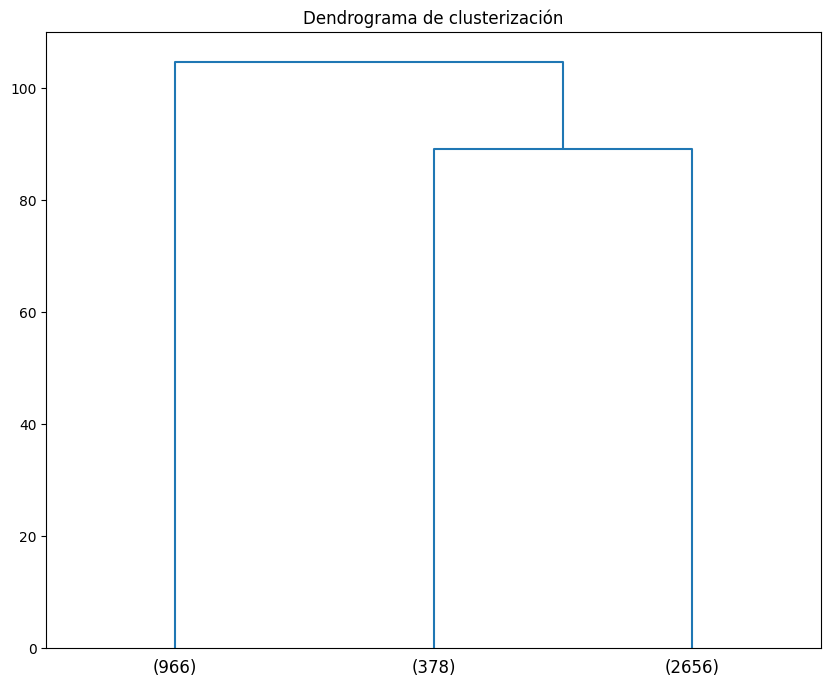

In [16]:
# Dejar de lado la columna con datos sobre la cancelación.

users_gym = gym.drop('churn', axis=1)



# estandarizar los datos 
scaler = StandardScaler()
users_gym_estandarizado = scaler.fit_transform(users_gym)


#crear una matriz de distancias

distancia = linkage(users_gym_estandarizado, method='ward') 


# Trazar un dendrograma
plt.figure(figsize=(10,8))
dendrogram(distancia, truncate_mode = "lastp", p=3)
plt.title("Dendrograma de clusterización")
plt.show()

- los dos clusters en el dendrograma pueden estar relacionados con patrones en las variables demográficas o de comportamiento de los usuarios. 

# Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

In [17]:
# users_gym

# creamos un objeto Kmeans con N=5
kmeans=KMeans(n_clusters=5)

#entrenamos el modelo
kmeans.fit(users_gym)

#predecimos los clusters para cada cliente 
clusters_predichos=kmeans.predict(users_gym)

#impresión de resultados

print(clusters_predichos)


[2 1 1 ... 1 2 3]


- En conclusión los clientes se pueden agrupar en diferentes clusters según sus características.
- la mayoría de clientes se agrupan en un solo cluster, mientras que un pequeño grupo de clientes se agrupa en otro cluster, y un solo cliente se agrupa en un cluster separado.

- En resumen, el análisis de clustering realizadoo proporciona una visión valiosa de la estructura subyacente de los datos de los clientes, lo que puede ser utilizdo para mejorar la comprensión de las necesidades y preferencias de los clientes.

# conclusión 
En términos de estrategia de marketing y atención al cliente estos resultados sugieren que:
- al mayoría de los clientes pueden ser atendidos de manera efectiva con una estrategia de marketing y atención al cliente estándar.
- el grupo de clientes en el cluster 1 puede requerir una estrategia de marketing y atención al cliente más personalizadda y específica.

- El cliente en el cluster 0 puede requerir una atención especial y personalizada, ya que no comparte características con los demás clientes.

In [18]:
#  los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

mean_clusters=gym.groupby(kmeans.labels_).mean()
print(mean_clusters)

     gender  near_location   partner  promo_friends     phone  \
0  0.521246       0.881020  0.511331       0.347025  0.898017   
1  0.514091       0.839650  0.451895       0.279883  0.897959   
2  0.508721       0.824612  0.488372       0.293605  0.907946   
3  0.511435       0.844075  0.495842       0.320166  0.902287   
4  0.468635       0.856089  0.516605       0.332103  0.926199   

   contract_period  group_visits        age  avg_additional_charges_total  \
0         5.400850      0.433428  29.344193                    250.984767   
1         4.301263      0.407191  28.973761                    105.932804   
2         4.198643      0.387597  28.908915                     35.600722   
3         4.755717      0.423077  29.401247                    174.873445   
4         5.822878      0.431734  29.845018                    356.481960   

   month_to_end_contract  lifetime  avg_class_frequency_total  \
0               5.001416  4.169972                   1.903480   
1               

- Agunas características como la "promo_friends" tiene valores medios muy similares en todos los clusters. Esto sugiere que la promoción no es un factor importante para distinguir entre los clusters.

- Algunos clusters, como el cluster 0, tienen valores medios muy bajos en algunas características, como la "promo_firends"y la "avg_class_frequency_current_month". esto sugiere que los clientes en este cluster pueden ser menos receptivos a promociones y tener un "avg_class_frequency_current_month" más baja.

- En general, estos resultados te permiten entender mejor cómo se relacionan las diferentes características entre sí y cómo se distribución en cada cluster. esto puede ser útil para desarrollar estrategias de marketing y atención al cliente más efectivas.

# Traza distribuciones de características para los clústeres. ¿Notas algo?

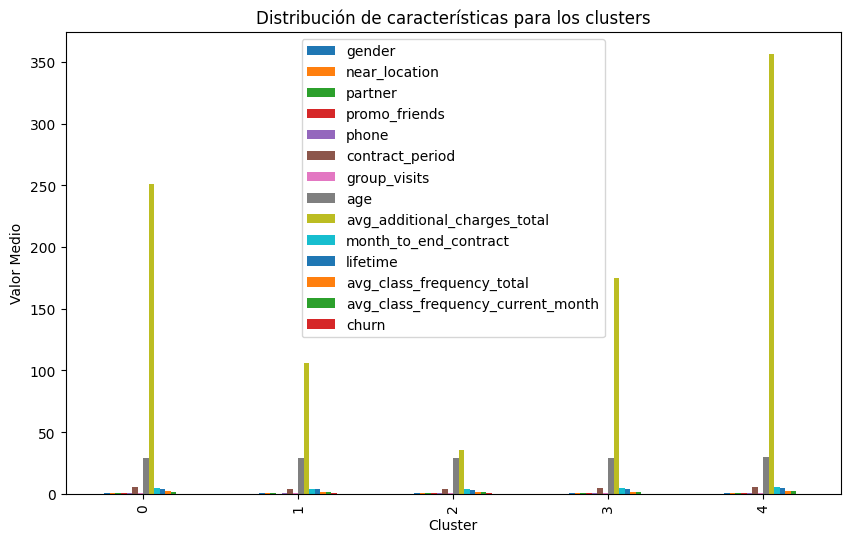

In [19]:
# gráfico para mostrar las caracteristicas para cada cluster
mean_clusters.plot(kind='bar', figsize=(10,6))
plt.title('Distribución de características para los clusters')
plt.xlabel('Cluster')
plt.ylabel('Valor Medio')
plt.show()

- constata nuestras conclusiones previas sobre los resultados de los mismos.
-  En resumen el avg_additional_charges_total, es una característica clave que influye en la segmentación de los clientes en diferentes clusters tiene una distribución única de características.


# Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [20]:
tasa_cancelacion=gym.groupby(kmeans.labels_)['churn'].mean()*100

print(tasa_cancelacion)

0    17.847025
1    33.430515
2    34.980620
3    22.661123
4     4.428044
Name: churn, dtype: float64


- El cluster 0 y 3(bajo_moderada) son los más leales, con una tasa de cancelación mas bajas, lo que sugiere que los clientes tienen una probabilidad baja de cncelar su membresía.

- los clusters 1 y 4 son los más propensos a cancelar, con tasas de cancelación altas.

- El cluster 2 tiene una probabilidad moderada de cancelar su menbresía.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Se nota claramente la segmentación entre los diferentes grupos ya que tienen un churn rate diferente
    
</div>

# Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes
- Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.

- No necesitas entrar en detalles. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.

- Principi 1 (Personalización)
- Implementación: crear un programa de membresía personalizado que se adapte a las necesidades y objetivos individuales de cada cliente.

- Pasos de Marketing: 
- Envío de correos electrónicos personalizados con recomendaciones de entrenamiento y servicio.
- Asignación de un entrenador personal que se encargue de seguir el progreso del cliente.


Principio 2: Comunicación efectiva 

- Implementación: establecer canales de comunicación claros y efectivos con los clientes para mantenerlos infoormados y comprometidos.

- pasos de marketing:

- creación de un boletín informativo mensual con noticias, promociones y consejos de entrenamiento.

- Utilización de redes sociales para compartir contenido relevante e interactuar con los clientes.


principio 3: Reconocimiento y recompensa

- implementación: reconocer y recompensar a los clientes por su lealtad y logros.

- pasos de marketing:

- Creación de un programa de recompensas que ofrezca descuentos, servicios gratuitos o productos exclusivos.

- organizacion de eventos y actividades especiales para los clientes más leales.

Principio 4:Mejora Continua.


-  implementación: Recopilar retroalimentación de los clientes y utilizarla para mejorar los servicios y programas del gimnasio.

- pasos de marketing 

- Realización de encuestas y sondeos para recopilar retroalimentación de los clientes.

- Análisis de resultados e implementación de cambios y mejoras en los servicios y programas del gimnasio. 


<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, manejaste muy bien los datos previo al entrenamiento de tus modelos y analizaste muy bien los resultados.
    
Te felicito por las conclusiones planteadas luego de ver los resultados de la segmentación utilizando los cluster, un buen análisis siempre debe venir acompañado de recomendaciones que ayuden a la toma de decisiones que en este caso haz planteado sugerencias muy buenas en cuanto a los diferentes tipos de usuarios obtenidos.
    
    
Saludos!
</div>